numpy_mult
[[131 210 168 143]
 [ 65 107  92  76]
 [116 184 160 130]
 [154 219 188 160]]
Verification: PASS
listcomp_mult
[[131 210 168 143]
 [ 65 107  92  76]
 [116 184 160 130]
 [154 219 188 160]]
Verification: PASS
simple_mult
[[131 210 168 143]
 [ 65 107  92  76]
 [116 184 160 130]
 [154 219 188 160]]
Verification: PASS
divide_conq_mult
[[131 210 168 143]
 [ 65 107  92  76]
 [116 184 160 130]
 [154 219 188 160]]
Verification: PASS
strassen_mult
[[131 210 168 143]
 [ 65 107  92  76]
 [116 184 160 130]
 [154 219 188 160]]
Verification: PASS
                        4          16           64
numpy_mult        0.063419   0.106812     4.932880
listcomp_mult     0.034332   1.814604    85.162640
simple_mult       0.023365   5.817890   146.622896
divide_conq_mult  0.249624  47.084570  1934.877634
strassen_mult     3.357649  64.132690  2313.431263


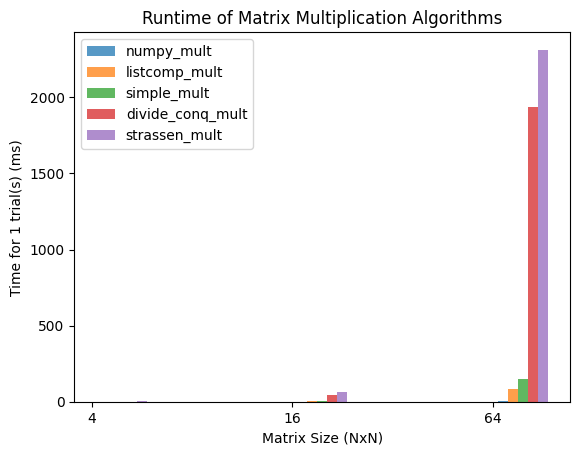

In [1]:
# 🧮 Matrix Multiplication Algorithm Comparison

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
import math

# 📊 Plot and print utilities (same as previous assignments)
def plot_times(dict_algs, sizes, trials, algs, file_name):
    alg_num = 0
    plt.xticks([j for j in range(len(sizes))], [str(size) for size in sizes])
    for alg in algs:
        alg_num += 1
        d = dict_algs[alg.__name__]
        x_axis = [j + 0.05 * alg_num for j in range(len(sizes))]
        y_axis = [d[i] for i in sizes]
        plt.bar(x_axis, y_axis, width=0.05, alpha=0.75, label=alg.__name__)
    plt.legend()
    plt.title("Runtime of Matrix Multiplication Algorithms")
    plt.xlabel("Matrix Size (NxN)")
    plt.ylabel(f"Time for {trials} trial(s) (ms)")
    plt.savefig(file_name)
    plt.show()

def print_times(dict_algs, filename):
    pd.set_option("display.max_rows", 500)
    pd.set_option("display.max_columns", 500)
    pd.set_option("display.width", 1000)
    df = pd.DataFrame.from_dict(dict_algs).T
    print(df)
    with open(filename, "w") as f:
        f.write(df.to_string())

# Generate a random matrix of integers between mn and mx
def random_matrix(mn, mx, rows, cols):
    return [[random.randint(mn, mx) for _ in range(cols)] for _ in range(rows)]

# NumPy built-in matrix multiplication (baseline)
def numpy_mult(mat1, mat2, n):
    return np.matmul(mat1, mat2)

# Matrix multiplication using nested list comprehensions
def listcomp_mult(mat1, mat2, n):
    return [[sum([mat1[i][k] * mat2[k][j] for k in range(n)]) for j in range(n)] for i in range(n)]

# Naive triple loop matrix multiplication
def simple_mult(mat1, mat2, n):
    res = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                res[i][j] += mat1[i][k] * mat2[k][j]
    return res

# Divide-and-conquer matrix multiplication (basic recursive approach)
def add_matrix(A, B, C, split):
    for i in range(split):
        for j in range(split):
            C[i][j] = A[i][j] + B[i][j]

def multiply_matrix(A, B):
    col1, row1 = len(A[0]), len(A)
    col2, row2 = len(B[0]), len(B)
    if col1 != row2:
        raise ValueError("Matrix dimensions do not match for multiplication")
    if col1 == 1:
        return [[A[0][0] * B[0][0]]]
    split = col1 // 2
    a00 = [[A[i][j] for j in range(split)] for i in range(split)]
    a01 = [[A[i][j + split] for j in range(split)] for i in range(split)]
    a10 = [[A[i + split][j] for j in range(split)] for i in range(split)]
    a11 = [[A[i + split][j + split] for j in range(split)] for i in range(split)]
    b00 = [[B[i][j] for j in range(split)] for i in range(split)]
    b01 = [[B[i][j + split] for j in range(split)] for i in range(split)]
    b10 = [[B[i + split][j] for j in range(split)] for i in range(split)]
    b11 = [[B[i + split][j + split] for j in range(split)] for i in range(split)]
    r00 = [[0] * split for _ in range(split)]
    r01 = [[0] * split for _ in range(split)]
    r10 = [[0] * split for _ in range(split)]
    r11 = [[0] * split for _ in range(split)]
    add_matrix(multiply_matrix(a00, b00), multiply_matrix(a01, b10), r00, split)
    add_matrix(multiply_matrix(a00, b01), multiply_matrix(a01, b11), r01, split)
    add_matrix(multiply_matrix(a10, b00), multiply_matrix(a11, b10), r10, split)
    add_matrix(multiply_matrix(a10, b01), multiply_matrix(a11, b11), r11, split)
    result = [[0] * (2 * split) for _ in range(2 * split)]
    for i in range(split):
        for j in range(split):
            result[i][j] = r00[i][j]
            result[i][j + split] = r01[i][j]
            result[i + split][j] = r10[i][j]
            result[i + split][j + split] = r11[i][j]
    return result

def divide_conq_mult(mat1, mat2, n):
    return multiply_matrix(mat1, mat2)

# Strassen's matrix multiplication (optimized divide-and-conquer)
def split(matrix):
    row, col = matrix.shape
    mid = row // 2
    return matrix[:mid, :mid], matrix[:mid, mid:], matrix[mid:, :mid], matrix[mid:, mid:]

def strassen(A, B):
    if len(A) == 1:
        return A * B
    a, b, c, d = split(A)
    e, f, g, h = split(B)
    p1 = strassen(a, f - h)
    p2 = strassen(a + b, h)
    p3 = strassen(c + d, e)
    p4 = strassen(d, g - e)
    p5 = strassen(a + d, e + h)
    p6 = strassen(b - d, g + h)
    p7 = strassen(a - c, e + f)
    c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2
    c21 = p3 + p4
    c22 = p1 + p5 - p3 - p7
    return np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))

def strassen_mult(mat1, mat2, n):
    return strassen(np.array(mat1), np.array(mat2))

# Verifies if the matrix product is correct by comparing with NumPy's result
def verify_result(mat1, mat2, computed_result):
    return np.array_equal(np.matmul(mat1, mat2), np.array(computed_result))

# Run and time all algorithms across different matrix sizes
def run_algs(algs, sizes, trials, mn=1, mx=10):
    dict_algs = {alg.__name__: {} for alg in algs}
    for size in sizes:
        for alg in algs:
            dict_algs[alg.__name__][size] = 0
        for trial in range(trials):
            mat1 = random_matrix(mn, mx, size, size)
            mat2 = random_matrix(mn, mx, size, size)
            for alg in algs:
                start = time.time()
                result = alg(mat1, mat2, size)
                end = time.time()
                if size == sizes[0]:
                    print(alg.__name__)
                    print(np.array(result))
                    print("Verification:", "PASS" if verify_result(mat1, mat2, result) else "FAIL")
                dict_algs[alg.__name__][size] += 1000 * (end - start)
    return dict_algs

# Main function
def main():
    assn = "assignment03"
    sizes = [4, 16, 64]
    algs = [numpy_mult, listcomp_mult, simple_mult, divide_conq_mult, strassen_mult]
    trials = 1
    dict_algs = run_algs(algs, sizes, trials)
    print_times(dict_algs, assn + ".txt")
    plot_times(dict_algs, sizes, trials, algs, assn + ".png")

if __name__ == "__main__":
    main()

# 📌 Note: Graph and time summary will be saved as PNG and TXT files respectively.
